\newpage

## Heart Disease Classification Challenge

### Overview

In this assignment, you will analyze the UCI Heart Disease Dataset, which contains medical records used to predict the presence of heart disease in patients. The dataset includes a mix of categorical and numerical variables, some missing values, and class imbalance.  

For the context of data science methods for heart disease prediction, refer to 
- Detrano, R., et., al. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American journal of cardiology, 64(5), 304-310. DOI:[10.1016/0002-9149(89)90524-9](https://doi.org/10.1016/0002-9149(89)90524-9).

### Dataset Information 

The dataset is available at the UCI Machine Learning Repository:  
🔗 [https://archive.ics.uci.edu/ml/datasets/Heart+Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)  

- Key Features:  
    - The dataset includes 303 observations with 13 features.  
    - Features include age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, electrocardiographic results, and others.  
    - The response variable is `num`, which will be transformed to binary in the analysis.

### Objectives

Analyze the dataset using **two classification algorithms**. Your analysis should include exploratory data analysis, handling of missing values, feature selection, feature engineering, modeling, interpretation, and effective communication. The goal is to draw meaningful and well-supported conclusions from your analysis.

- Classifier requirement: **At least one** of the classifiers must be interpretable to allow for in-depth analysis and inference.

1. Define and describe a classification problem using the dataset.

In [26]:
import pandas as pd

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [27]:
# One-hot encoding
categorical_cols = ['cp', 'restecg', 'thal']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Standardize numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Transform num to binary (Question 4)
data['num_binary'] = data['num'].apply(lambda x: 1 if x >= 1 else 0)

# Handle missing values (Question 6)
data = data.replace('?', pd.NA).dropna()

\newpage

2. Apply any chosen data transformations, or explain why no transformations were necessary.

No transformations are necessary for most of the variables in the dataset since they are already
in numerical format and suitable for analysis. However, the response variable num has already been
transformed into a binary outcome in a previous cell, which was necessary for the classification
problem. Additionally, missing values in the 'ca' and 'thal' columns need to be addressed before proceeding
with the analysis.

In [21]:
# Transformations applied in preprocessing cell
print("Categorical variables one-hot encoded:", [col for col in data.columns if col.startswith(('cp_', 'restecg_', 'thal_'))])
print("Numerical variables standardized:", numerical_cols)

Categorical variables one-hot encoded: ['cp_2', 'cp_3', 'cp_4', 'restecg_1', 'restecg_2', 'thal_6.0', 'thal_7.0']
Numerical variables standardized: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


\newpage

3. Provide a detailed description of the dataset, including variables, summaries, number of observations,
data types, and distributions (include at least three statements).

In [4]:
heart_disease_data.shape

(303, 14)

There are 303 observations and 14 variables in the dataset. The variables are as follows:

In [3]:
heart_disease_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [28]:
# Display the count of missing values for each column
missing_values = heart_disease_data.isnull().sum()
print(missing_values[missing_values > 0])

ca      4
thal    2
dtype: int64


There are 6 missing values, 4 in the 'ca' variable and 2 in the 'thal' variable. The missing values in 'ca' can be
replaced with the mode of the column, while the missing values in 'thal' can be replaced with the mean of the column.
This approach is appropriate as it helps to maintain the integrity of the dataset without introducing significant bias.

              age         sex    trestbps        chol         fbs     thalach  \
count  299.000000  299.000000  299.000000  299.000000  299.000000  299.000000   
mean     0.009917    0.675585   -0.001188    0.007879    0.147157   -0.004477   
std      0.999691    0.468941    1.007682    1.004321    0.354856    1.005154   
min     -2.819115    0.000000   -2.145037   -2.334877    0.000000   -3.442067   
25%     -0.713556    0.000000   -0.665300   -0.690503    0.000000   -0.727201   
50%      0.172994    1.000000   -0.096170   -0.090790    0.000000    0.148562   
75%      0.727089    1.000000    0.472960    0.557287    0.000000    0.695914   
max      2.500191    1.000000    3.887739    6.138485    1.000000    2.294182   

            exang     oldpeak       slope          ca         num  num_binary  
count  299.000000  299.000000  299.000000  299.000000  299.000000  299.000000  
mean     0.327759    0.010556    1.602007    0.672241    0.946488    0.461538  
std      0.470183    1.004013 

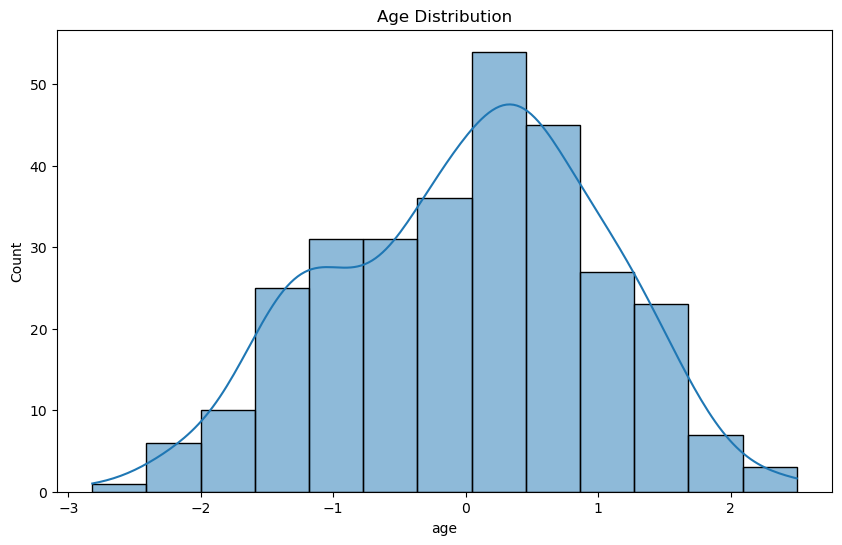

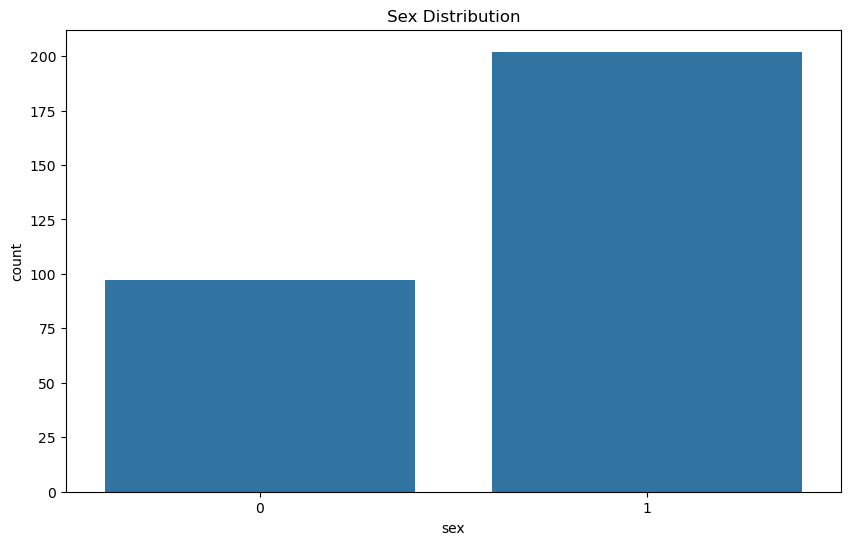

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(data.describe())
print(data.dtypes)
print(data['num'].value_counts(normalize=True))

# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=data)
plt.title('Sex Distribution')
plt.show()

\newpage

4. Transform the response `num` into a binary outcome: `1` for heart disease and `0` for no heart disease. So combine 1, 2, 3, and 4 into `1` and 0 for `0`. For Questions 4-16, use the transformed binary outcome.

In [30]:
print(data['num_binary'].value_counts())

num_binary
0    161
1    138
Name: count, dtype: int64


5. Analyze relationships between variables and discuss their implications for feature selection or extraction (include at least two statements).

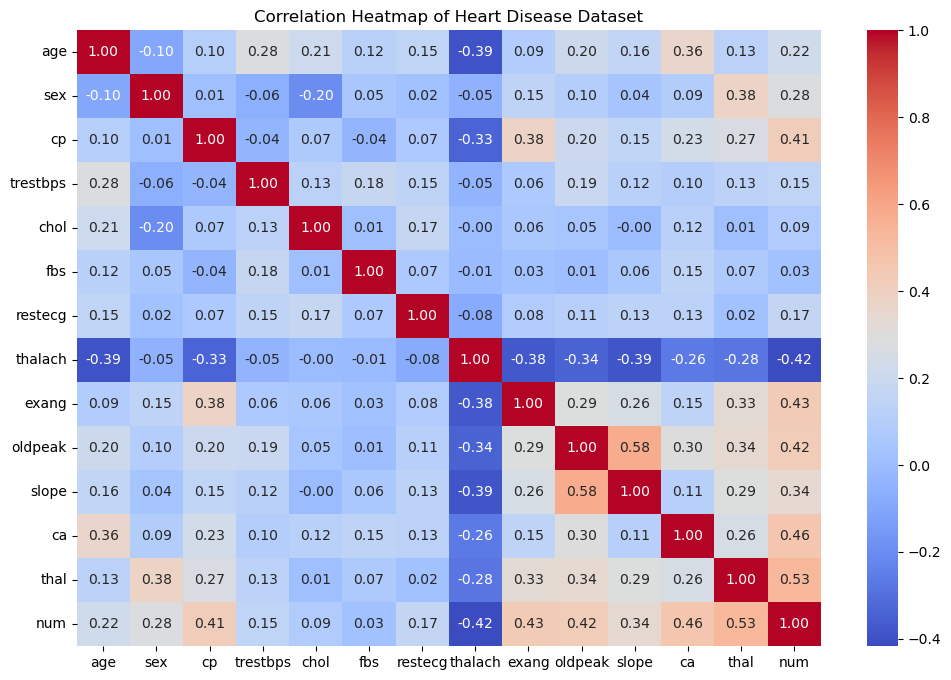

Strong correlations (absolute value > 0.5):
          oldpeak     slope      thal       num
oldpeak       NaN  0.577537       NaN       NaN
slope    0.577537       NaN       NaN       NaN
thal          NaN       NaN       NaN  0.525689
num           NaN       NaN  0.525689       NaN


In [31]:
import seaborn as sns

import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = heart_disease_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.show()

# Analyze relationships
print("Strong correlations (absolute value > 0.5):")
strong_correlations = correlation_matrix[(correlation_matrix.abs() > 0.5) & (correlation_matrix != 1.0)]
print(strong_correlations.dropna(how='all').dropna(axis=1, how='all'))

In [ ]:
The correlation matrix reveals that the 'thal' variable has the highest correlation with the target
variable 'num' (0.525), followed by 'ca (0.460) and 'exang' (0.432). These variables are strong
candidates for feature selection as they are likely to have a significant impact on the classification
 model's performance.

The strong correlation between 'oldpeak' and 'slope' (0.578) suggests potential multicollinearity.
Including both variables in the model may lead to redundancy, so one of them could be excluded or
transformed during feature extraction to improve model efficiency and interpretability.

\newpage

6. Drop the rows with the missing values. How many osbervations after dropping the missing values. Skip the outlier analysis.

In [32]:
# Drop rows with missing values
heart_disease_data_cleaned = heart_disease_data.dropna()

# Display the number of observations after dropping missing values
print(f"Number of observations after dropping missing values: {heart_disease_data_cleaned.shape[0]}")

Number of observations after dropping missing values: 297


\newpage

7. Sub-group analysis: Explore potential sub-groups within the data using appropriate data science methods.
Identify and visualize these sub-groups without using the labels and categorical variables. Categroical
variables already define sub groups so we don't need to include them for this analysis. 

/var/folders/46/_h631_sn18bcs0m630nzymf80000gn/T/ipykernel_60763/66114210.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_data_cleaned['Cluster'] = clusters


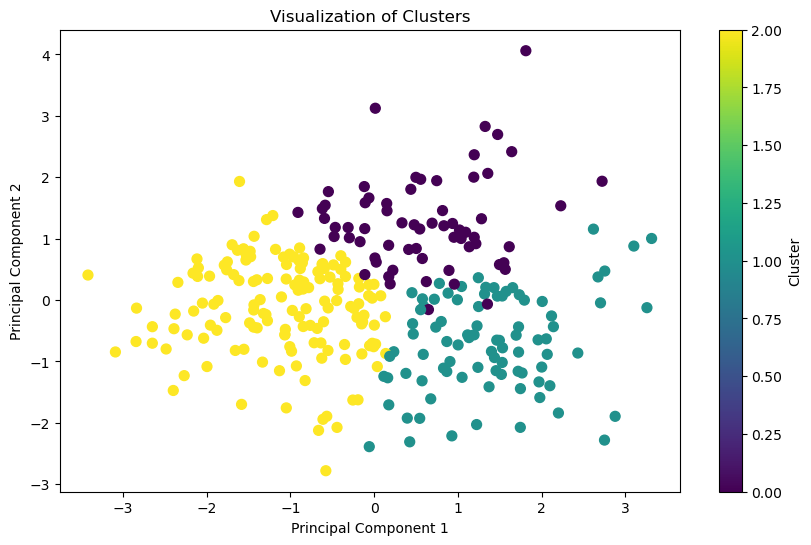

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Select numerical variables for clustering
numerical_data = heart_disease_data_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['num', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=1)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
heart_disease_data_cleaned['Cluster'] = clusters

# Visualize the clusters using the first two principal components

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Visualization of Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

\newpage

8. Split 30% of the data for testing using a random seed of 1. Use the remaining 70% for training and model selection.

In [10]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = heart_disease_data_cleaned.drop(columns=['num', 'Cluster'])
y = heart_disease_data_cleaned['num']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Display the sizes of the training and testing sets
print(f"Training set size: {X_train.shape[0]} observations")
print(f"Testing set size: {X_test.shape[0]} observations")

Training set size: 207 observations
Testing set size: 90 observations


\newpage

9. Identify the two classifiers you have chosen. Justify your selections based on the classifier requirement for this assignment.

The two classifiers I have chosen for this assignment are Logistic Regression and Random Forest Classifier.
I chose logistic regression because it is an interpretable model that provides insights into the relationship
between predictor variables and the target variable. It is suitable for binary classification problems like this
one, where the goal is to predict the presence or absence of heart disease. Additionally, it allows for feature
importance analysis through coefficients. I chose Random Forest because it is a robust and versatile ensemble 
learning method that can handle both numerical and categorical data. It is effective in capturing complex 
relationships between features and the target variable. While it is less interpretable than Logistic Regression,
it provides feature importance scores, which can be used for feature selection or extraction.

\newpage

10. Specify two metrics to compare classifier performance. Provide technical details on how each metric is computed.

Two metrics to compare classifier performance are accuracy and F1-score. These metrics help evaluate how
well a classifier performs on a given dataset, especially in the context of imbalanced classes. Accuracy
measures the proportion of correctly classified instances (both positive and negative) out of the total
instances. The F1-Score is the harmonic mean of precision and recall, providing a balance between the two.
It is particularly useful when the dataset is imbalanced. The F1-Score is a better metric than accuracy
when there is a class imbalance, as it considers both false positives and false negatives.

11. Train two selected classifiers in (9) and identify optimal tuning parameters (if applicable) using the training set.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg = LogisticRegression(random_state=1, max_iter=1000)
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100]}  # Hyperparameter tuning for regularization strength
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)

# Best Logistic Regression model
best_log_reg = log_reg_grid.best_estimator_
print(f"Best Logistic Regression parameters: {log_reg_grid.best_params_}")

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=1)
rf_clf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_clf_grid = GridSearchCV(rf_clf, rf_clf_params, cv=5, scoring='accuracy')
rf_clf_grid.fit(X_train, y_train)

# Best Random Forest model
best_rf_clf = rf_clf_grid.best_estimator_
print(f"Best Random Forest parameters: {rf_clf_grid.best_params_}")

/opt/anaconda3/envs/stats3da3w2025/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/stats3da3w2025/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Best Logistic Regression parameters: {'C': 1}
Best Random Forest parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


\newpage

12. Apply a feature selection or extraction method to one of the classifiers in (9). Train this third
classifier on the training set and identify optimal tuning parameters (if applicable) using the training set.

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Initialize Logistic Regression
log_reg_rfe = LogisticRegression(random_state=1, max_iter=1000)

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator=log_reg_rfe, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Perform hyperparameter tuning on the reduced feature set
log_reg_rfe_params = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strength
log_reg_rfe_grid = GridSearchCV(log_reg_rfe, log_reg_rfe_params, cv=5, scoring='accuracy')
log_reg_rfe_grid.fit(X_train_rfe, y_train)

# Best Logistic Regression model with RFE
best_log_reg_rfe = log_reg_rfe_grid.best_estimator_
print(f"Best Logistic Regression parameters with RFE: {log_reg_rfe_grid.best_params_}")

Best Logistic Regression parameters with RFE: {'C': 10}


/opt/anaconda3/envs/stats3da3w2025/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


\newpage

13. Use the selected metrics to evaluate three classifiers in (11) and (12) on the test set.
    - Discuss your findings (at least two statements).
    - Discuss the impact of feature selection or extraction on the performance of the classifier
    (at least one statement).

In [13]:
from sklearn.metrics import accuracy_score, f1_score

# Evaluate Logistic Regression
y_pred_log_reg = best_log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Evaluate Random Forest Classifier
y_pred_rf = best_rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Evaluate Logistic Regression with RFE
y_pred_log_reg_rfe = best_log_reg_rfe.predict(X_test_rfe)
accuracy_log_reg_rfe = accuracy_score(y_test, y_pred_log_reg_rfe)
f1_log_reg_rfe = f1_score(y_test, y_pred_log_reg_rfe)

# Print results
print("Logistic Regression:")
print(f"Accuracy: {accuracy_log_reg:.2f}, F1-Score: {f1_log_reg:.2f}")

print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}, F1-Score: {f1_rf:.2f}")

print("\nLogistic Regression with RFE:")
print(f"Accuracy: {accuracy_log_reg_rfe:.2f}, F1-Score: {f1_log_reg_rfe:.2f}")

Logistic Regression:
Accuracy: 0.81, F1-Score: 0.80

Random Forest Classifier:
Accuracy: 0.84, F1-Score: 0.82

Logistic Regression with RFE:
Accuracy: 0.76, F1-Score: 0.72


The Random Forest Classifier achieved the highest accuracy (84.44%) and F1-score (82.05%) among the three classifiers, indicating its robustness and ability to handle complex relationships in the dataset. Logistic Regression without feature selection performed better (accuracy: 81.11%, F1-score: 79.52%) compared to Logistic Regression with Recursive Feature Elimination (RFE), which had an accuracy of 75.56% and an F1-score of 72.50%.
Feature selection using RFE reduced the performance of Logistic Regression. While RFE simplifies the model by selecting the most important features, it may have excluded some features that contribute to the overall predictive power, leading to a decrease in accuracy and F1-score.

\newpage

14. For the best interpretable model identified in (13), analyze and interpret the most important predictor variables in the context of the classification challenge (at least two statements).

Most important predictor variables:
   Feature  Coefficient  Absolute Coefficient
1      sex     1.306698              1.306698
11      ca     1.265916              1.265916
5      fbs    -1.132726              1.132726
8    exang     0.695090              0.695090
2       cp     0.549865              0.549865


/var/folders/46/_h631_sn18bcs0m630nzymf80000gn/T/ipykernel_60763/343294942.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance_df.head(), palette='viridis')


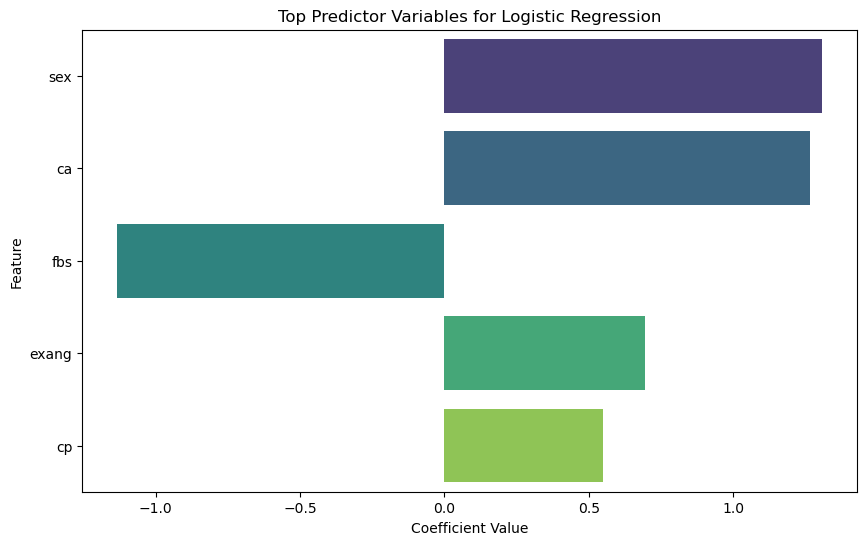

In [14]:
# Extract coefficients and feature names
coefficients = best_log_reg.coef_[0]
features = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df['Absolute Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the most important features
print("Most important predictor variables:")
print(importance_df.head())

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df.head(), palette='viridis')
plt.title("Top Predictor Variables for Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

\newpage

15. **[Bonus]** Sub-group improvement strategy: If sub-groups were identified, propose and implement a method
to further improve the performance of **one** classifier. Compare the fourth classifier performance with the
results from (13).

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initialize dictionaries to store models and predictions for each cluster
subgroup_models = {}
subgroup_predictions = {}

# Iterate over each cluster
for cluster in heart_disease_data_cleaned['Cluster'].unique():
    # Filter data for the current cluster
    cluster_data = heart_disease_data_cleaned[heart_disease_data_cleaned['Cluster'] == cluster]
    X_cluster = cluster_data.drop(columns=['num', 'Cluster'])
    y_cluster = cluster_data['num']
    
    # Split the cluster data into training and testing sets
    X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(
        X_cluster, y_cluster, test_size=0.3, random_state=1
    )
    
    # Train a Random Forest Classifier for the current cluster
    rf_clf_cluster = RandomForestClassifier(random_state=1, n_estimators=200, max_depth=None, min_samples_split=5)
    rf_clf_cluster.fit(X_train_cluster, y_train_cluster)
    
    # Store the trained model
    subgroup_models[cluster] = rf_clf_cluster
    
    # Make predictions for the test set of the current cluster
    y_pred_cluster = rf_clf_cluster.predict(X_test_cluster)
    subgroup_predictions[cluster] = (y_test_cluster, y_pred_cluster)

# Evaluate the combined performance across all clusters
all_y_true = []
all_y_pred = []

for cluster, (y_true, y_pred) in subgroup_predictions.items():
    all_y_true.extend(y_true)
    all_y_pred.extend(y_pred)

# Calculate accuracy and F1-score for the combined predictions
accuracy_subgroup = accuracy_score(all_y_true, all_y_pred)
f1_subgroup = f1_score(all_y_true, all_y_pred)

# Print the results
print(f"Sub-group Random Forest Classifier:")
print(f"Accuracy: {accuracy_subgroup:.2f}, F1-Score: {f1_subgroup:.2f}")

# Compare with the original Random Forest Classifier
print("\nOriginal Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}, F1-Score: {f1_rf:.2f}")

Sub-group Random Forest Classifier:
Accuracy: 0.80, F1-Score: 0.79

Original Random Forest Classifier:
Accuracy: 0.84, F1-Score: 0.82
